# Titanic dataset - EDA and Preprocessing

The Titanic dataset present a binary classification problem, where the goal is to predict whether a passenger survived or not. 

The dataset is split into two files: train.csv and test.csv. The train.csv file contains the training data, while the test.csv file contains the test data. The test data does not contain the Survived column, which is the target variable. The goal is to predict the Survived column for the test data.

Notes: 
- The dataset is small, with only 891 samples in the training data.
- The dataset is imbalanced, with 549 samples of class 0 and 342 samples of class 1.
- The dataset contains missing values that need to be handled
- The dataset contains categorical variables that need to be encoded

The dataset is available on [Kaggle](https://www.kaggle.com/c/titanic) and contains the following columns:

| Variable | Definition                          | Key                        |
|----------|-------------------------------------|----------------------------|
| survival | Survival                            | 0 = No, 1 = Yes            |
| pclass   | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| sex      | Sex                                 |                            |
| Age      | Age in years                        |                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                    |
| parch    | # of parents / children aboard the Titanic |                    |
| ticket   | Ticket number                       |                            |
| fare     | Passenger fare                      |                            |
| cabin    | Cabin number                        |                            |
| embarked | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |



In [94]:
# import watermark
%reload_ext watermark
%watermark

Last updated: 2024-05-28T14:00:55.370566+02:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.24.0

Compiler    : MSC v.1935 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [95]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%watermark -w
%watermark -iv

Watermark: 2.4.3

seaborn   : 0.13.2
matplotlib: 3.7.5
pandas    : 2.1.4
numpy     : 1.26.4



In [96]:
# load dataset
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# combine train and test dataset to a single dataset
train_data['source'] = 'train'
test_data['source'] = 'test'
data = pd.concat([train_data, test_data], ignore_index=True)

# print the shape of the dataset
print('Train dataset shape (rows, columns):', train_data.shape)
print('Test dataset shape (rows, columns):', test_data.shape)

data.head()

Train dataset shape (rows, columns): (891, 13)
Test dataset shape (rows, columns): (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,train
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,train
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,train
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,train
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,train


In [97]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,test


Test dataset does not contain the 'Survived' column.

In [98]:
# inspect dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [99]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,891.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.49,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


In [100]:
# check nr of unique values in each column
data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
source            2
dtype: int64

In [101]:
# check for duplicates
data.duplicated().sum()

0

In [102]:
# count missing values
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

Number of persons/data points in total = 1309.  
- 263 missing values in the Age column
- 1 missing value in the Fare column
- 1014 missing values in the Cabin column
- 2 missing values in the Embarked column


In [103]:
# handle missing values by imputing using sklearn SimpleImputer
from sklearn.impute import SimpleImputer

# impute missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
data[['Age', 'Fare']] = num_imputer.fit_transform(data[['Age', 'Fare']])

# Impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = cat_imputer.fit_transform(data[['Embarked']])[:, 0]

# specify if Cabin is NaN or not
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1) # 0 if NaN/unspecified

data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
source           0
dtype: int64

In [104]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S,train
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C,train
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S,train


In [105]:
# prepare dataframe for using seaborn pairplot
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

# convert categorical columns to numerical
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source
0,1,0.00,3,1,22.00,1,0,7.25,0,2,train
1,2,1.00,1,0,38.00,1,0,71.28,1,0,train
2,3,1.00,3,0,26.00,0,0,7.92,0,2,train


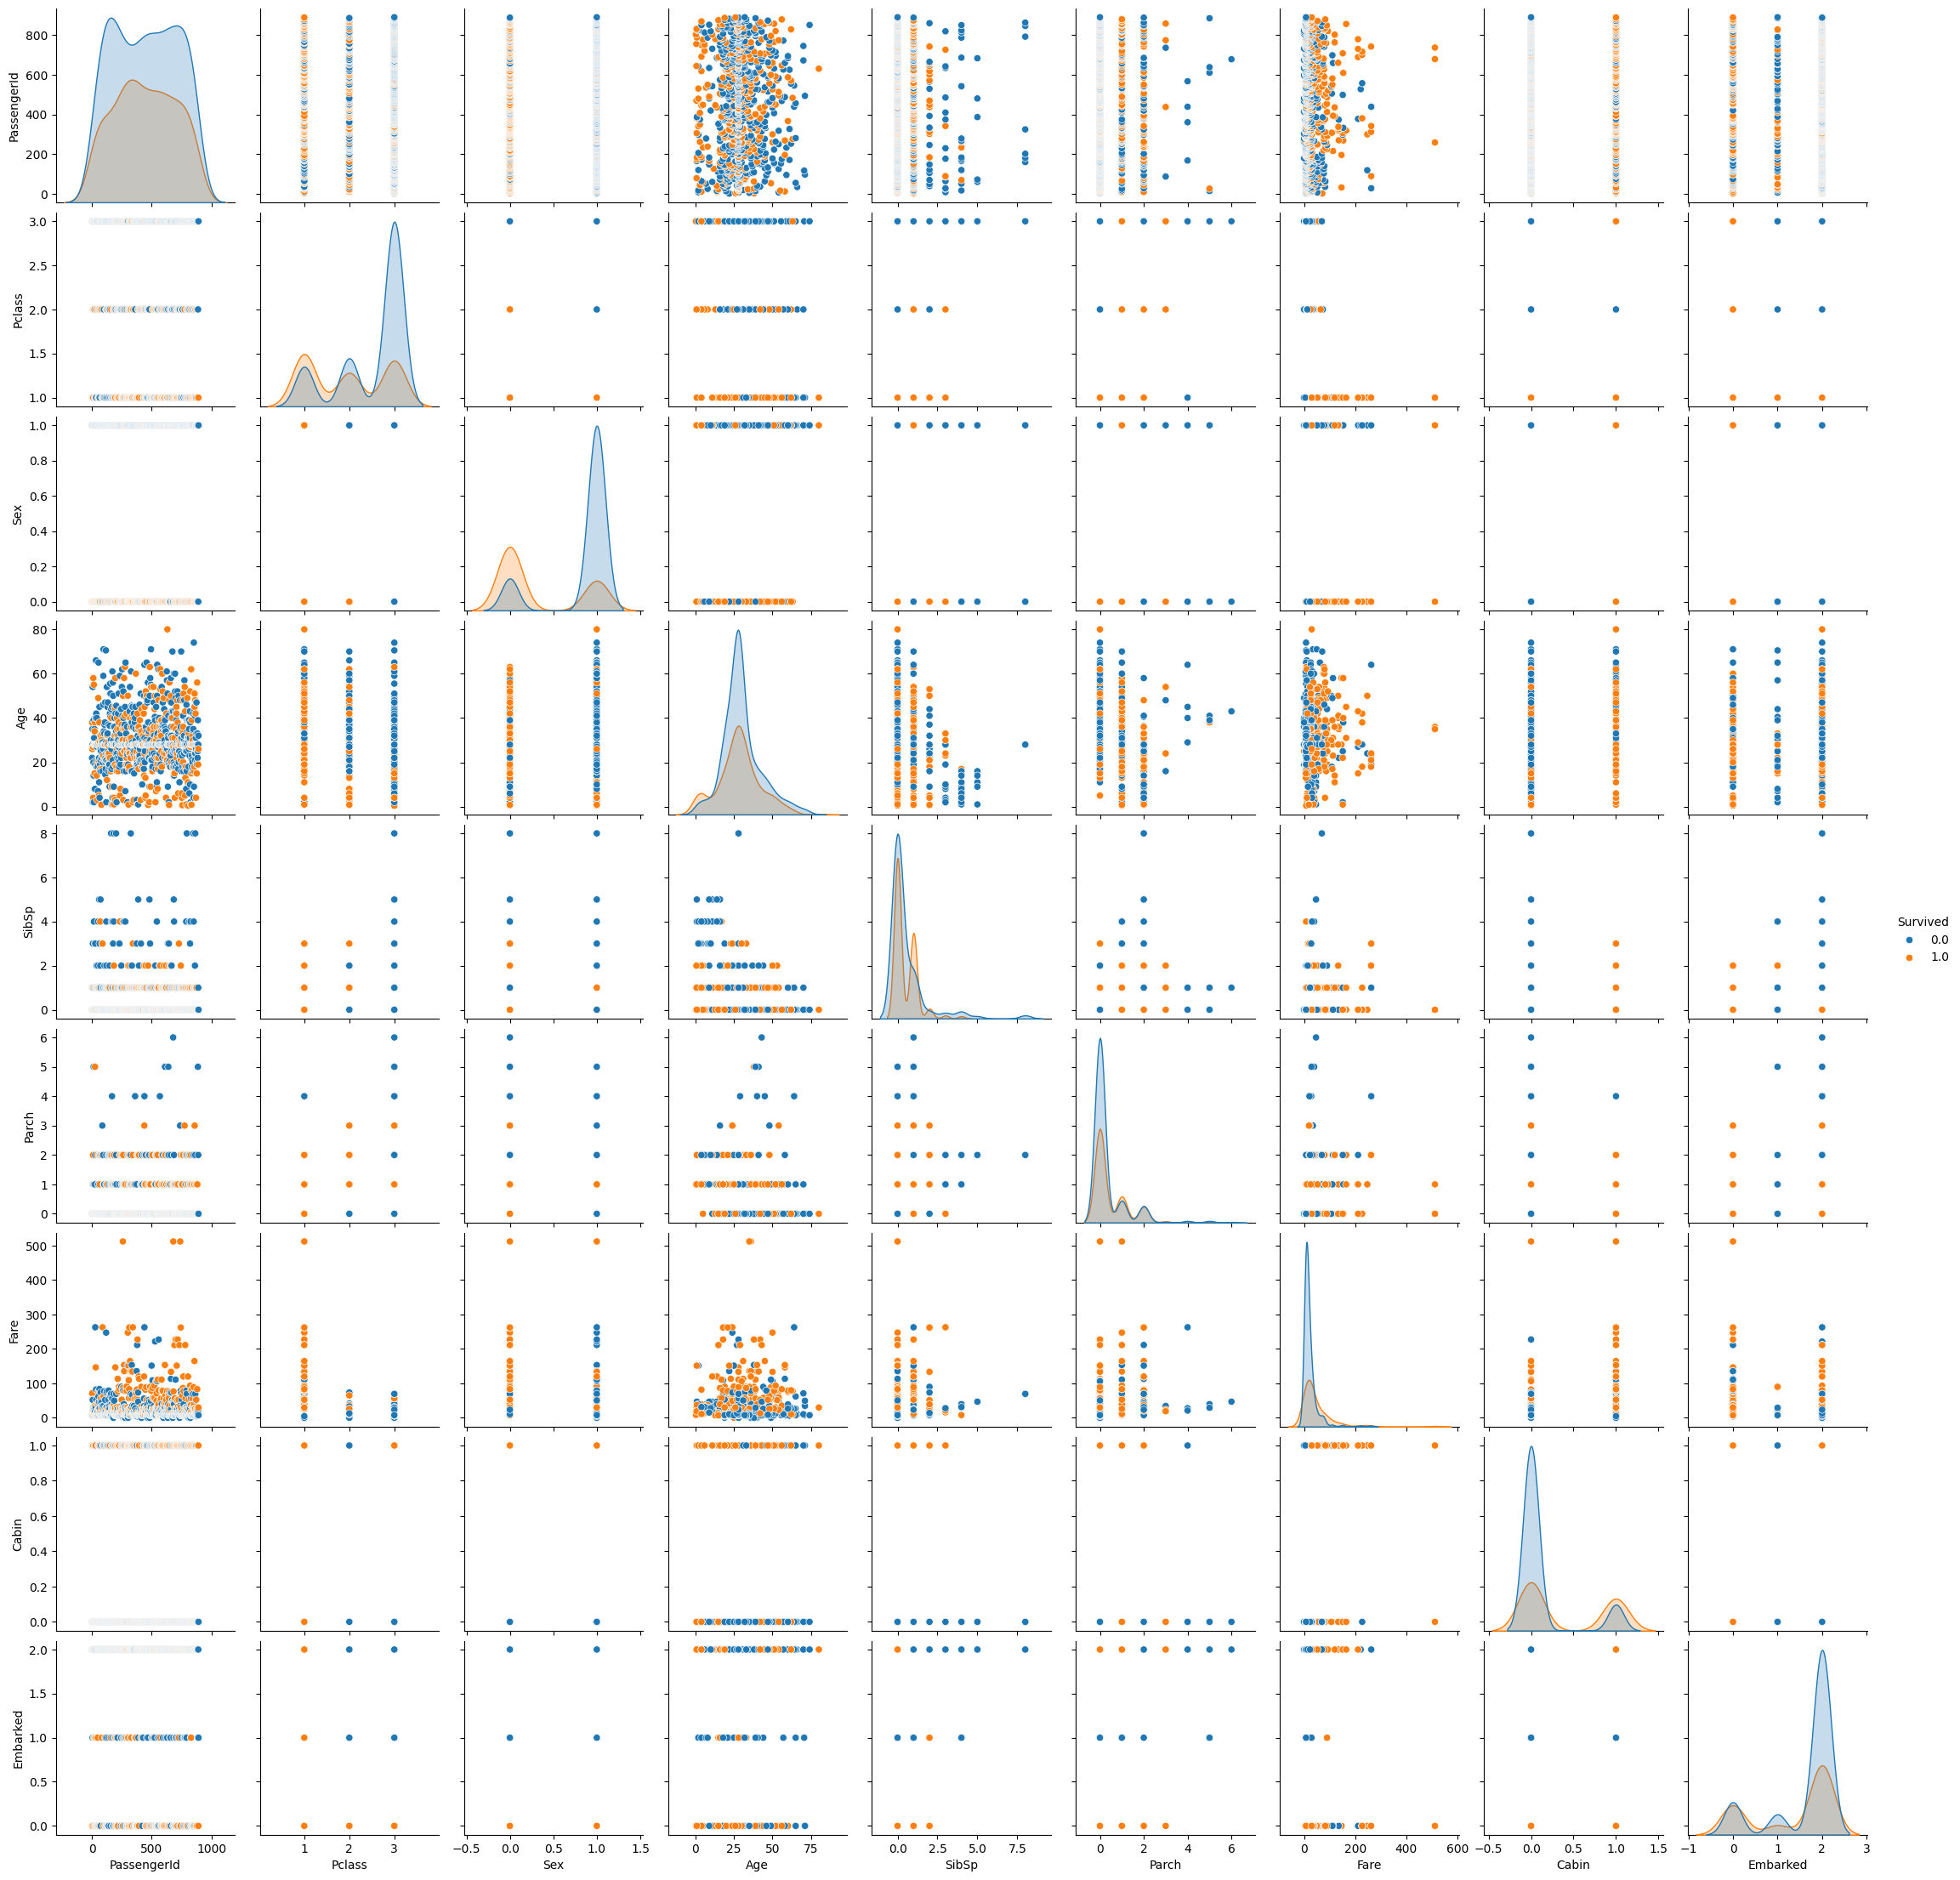

In [106]:
# seaborn pairplot on train data with survival as hue
sns.pairplot(data, hue='Survived')

| Observation                | Detail                            |
|----------------------------|-----------------------------------|
| Pclass=3                   | Significantly lower survival rate |
| Sex=1 (male)               | Significantly lower survival rate |
| Age < 10                   | Higher survival rate              |
| Parch=0                    | Lower survival rate               |
| Fare > 180                 | Higher survival rate              |
| Cabin=0 (NaN)              | Lower survival rate               |
| Embarked=2 (S; Southampton) | Lower survival rate               |


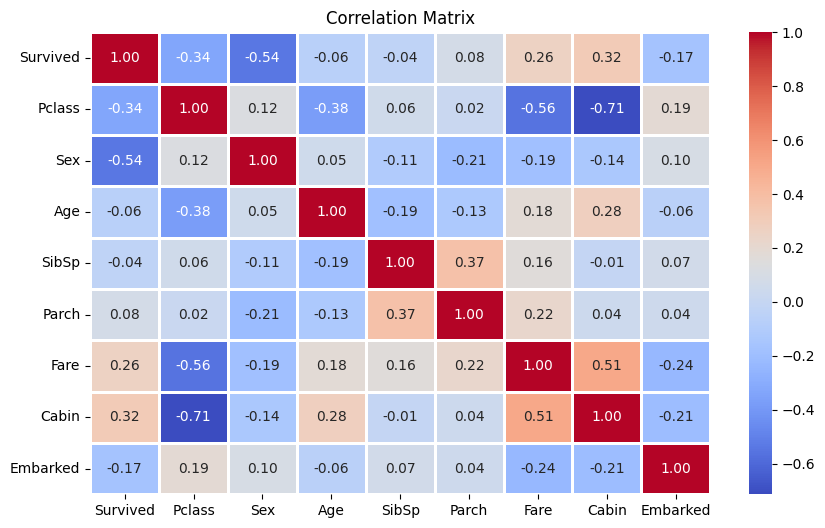

In [107]:
# show seaborn heatmap of correlation matrix
data_corr = data.copy()

# drop non-numeric columns: 'PassengerId', 'source'
data_corr = data_corr.drop(['PassengerId', 'source'], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

Observations from correlation matrix:
- Pclass and Cabin are correlated, -0.73
- Pclass and Fare are correlated, -0.55
- Pclass and Age are correlated, -0.34
- Fare and Cabin are correlated, 0.48
- Pclass and SibSp are correlated, 0.41

Pclass might be a better variable than the correlated Cabin and Fare variables.

Resulting features:

| Variable | Definition                          | Value                        |
|----------|-------------------------------------|----------------------------|
| survival | Survival                            | 0=No, 1=Yes            |
| pclass   | Ticket class                        | 1=1st, 2=2nd, 3=3rd  |
| sex      | Sex                                 | 0=Female, 1=Male                           |
| Age      | Age in years                        |                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                    |
| parch    | # of parents / children aboard the Titanic |                    |
| fare     | Passenger fare                      |                            |
| cabin    | Cabin number                        | 0=NaN/Unidentified, 1=Yes/Valid Cabin nr                           |
| embarked | Port of Embarkation                 | 0=Cherbourg, 1=Queenstown, 2=Southampton |

In [108]:
# move column Survived to the last column
data = data[[col for col in data if col != 'Survived'] + ['Survived']]
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,Survived
0,1,3,1,22.00,1,0,7.25,0,2,train,0.00
1,2,1,0,38.00,1,0,71.28,1,0,train,1.00
2,3,3,0,26.00,0,0,7.92,0,2,train,1.00
3,4,1,0,35.00,1,0,53.10,1,2,train,1.00
4,5,3,1,35.00,0,0,8.05,0,2,train,0.00


In [109]:
# pick a subset of columns to use as features
essential_cols = ["PassengerId", "source", "Survived"] # essential columns

# pick features to use
# features = ["Pclass", "Sex", "SibSp", "Parch"] # subset of features
features_cat = ['Pclass', 'Sex', 'Cabin', 'Embarked'] # all features
features_num = ['Age', 'Fare', 'SibSp', 'Parch'] # all features

# combine essential and features
# data = data[essential_cols + features] # subset of features
data = data[essential_cols + features_cat + features_num] # all features

In [110]:
# get dummies/one-hot encoding for categorical columns
data_dummies = pd.get_dummies(data, columns=features_cat, drop_first=True)
data_dummies.head()

,PassengerId,source,Survived,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,1,train,0.00,22.00,7.25,1,0,False,True,True,False,False,True
1,2,train,1.00,38.00,71.28,1,0,False,False,False,True,False,False
2,3,train,1.00,26.00,7.92,0,0,False,True,False,False,False,True
3,4,train,1.00,35.00,53.10,1,0,False,False,False,True,False,True
4,5,train,0.00,35.00,8.05,0,0,False,True,True,False,False,True


In [111]:
# Standardize the data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_dummies[features_num] = scaler.fit_transform(data_dummies[features_num])
data_dummies.head()

,PassengerId,source,Survived,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,1,train,0.00,-0.58,-0.50,0.48,-0.44,False,True,True,False,False,True
1,2,train,1.00,0.66,0.73,0.48,-0.44,False,False,False,True,False,False
2,3,train,1.00,-0.27,-0.49,-0.48,-0.44,False,True,False,False,False,True
3,4,train,1.00,0.43,0.38,0.48,-0.44,False,False,False,True,False,True
4,5,train,0.00,0.43,-0.49,-0.48,-0.44,False,True,True,False,False,True


In [112]:
# export cleaned data
data_dummies.to_csv('data/data_clean.csv', index=False)

In [113]:
# split into train and test datasets
train_data = data_dummies[data_dummies['source'] == 'train'].copy()
test_data = data_dummies[data_dummies['source'] == 'test'].copy()

# drop source column
train_data.drop('source', axis=1, inplace=True)
test_data.drop(['source', 'Survived'], axis=1, inplace=True)

# convert Survived column to integer
train_data['Survived'] = train_data['Survived'].astype(int)

train_data.head(3)

,PassengerId,Survived,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,1,0,-0.58,-0.50,0.48,-0.44,False,True,True,False,False,True
1,2,1,0.66,0.73,0.48,-0.44,False,False,False,True,False,False
2,3,1,-0.27,-0.49,-0.48,-0.44,False,True,False,False,False,True


In [114]:
test_data.head(3)

,PassengerId,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
891,892,0.39,-0.49,-0.48,-0.44,False,True,True,False,True,False
892,893,1.36,-0.51,0.48,-0.44,False,True,False,False,False,True
893,894,2.52,-0.46,-0.48,-0.44,True,False,True,False,True,False


In [115]:
# export cleaned data
# train_data.to_csv('data/train_clean_subsetFeatures.csv', index=False)
# test_data.to_csv('data/test_clean_subsetFeatures.csv', index=False)

train_data.to_csv('data/train_clean_allFeatures.csv', index=False)
test_data.to_csv('data/test_clean_allFeatures.csv', index=False)

print('Data cleaning and preprocessing completed.')

Data cleaning and preprocessing completed.
